## Importação das bibliotecas

In [13]:
# Bibliotecas do Sistema
import re

# Pacote para Manipulação de Dados
import pandas as pd
import numpy as np

# Pacotes Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Pacotes Estatisticos
from scipy.stats import norm

# Pacotes para Modelagem e Seleção de Features
from sklearn.feature_selection import f_regression

### Configurações

In [14]:
# Define o número máximo de colunas exibidas pelo pandas
pd.set_option('display.max_columns', 200)

# Define o pandas para exibir os números em ponto flutuante com duas casas decimais
pd.set_option('display.float_format', '{:.4f}'.format)

# Define o pandas para evitar a conversão silenciosa (downcasting) de tipos de dados
pd.set_option('future.no_silent_downcasting', True)

# Define o estilo do Seaborn
sns.set_style('darkgrid')

## Leitura dos dados

In [15]:
# Caminho do arquivo que contém os dados brutos
raw_data_path = '../data/raw/imoveis.json'
df = pd.read_json(raw_data_path, lines=True)
df.head()

,codigo_anunciante,codigo_zapimoveis,dtCriacao,dtColeta,imobiliaria,nrPreco,condominio,iptu,endereco,floorSize,numberOfRooms,numberOfBathroomsTotal,numberOfParkingSpaces,floorLevel,FURNISHED,POOL,ELEVATOR,LAVABO,SAUNA,PORCELAIN,INTERCOM,AIR_CONDITIONING,numberOfSuites,PETS_ALLOWED,BALCONY,BACKYARD,SPORTS_COURT,BARBECUE_GRILL,LAUNDRY,ALARM_SYSTEM,SERVICE_AREA,GARDEN,DEPOSIT,PLAYGROUND,SEA_VIEW,GOURMET_BALCONY,KITCHEN,PARTY_HALL,CABLE_TV,KITCHEN_CABINETS,SAFETY_CIRCUIT,GATED_COMMUNITY,HEATING,CONCIERGE_24H,WATCHMAN,GOURMET_SPACE,GYM,BICYCLES_PLACE,DINNER_ROOM,PAVED_STREET,RECEPTION,CLOSET,CARETAKER,ARMORED_SECURITY_CABIN,RECREATION_AREA,ELECTRONIC_GATE,INTERNET_ACCESS,BLINDEX_BOX,BEDROOM_WARDROBE,BATHROOM_CABINETS,DISABLED_ACCESS,HOME_OFFICE,SPA,TENNIS_COURT,INDOOR_SOCCER,MOUNTAIN_VIEW,CHILDRENS_POOL,DECK,MASSAGE_ROOM,GRASS,CINEMA,SQUASH,COPA,AMERICAN_KITCHEN,ELECTRIC_GENERATOR,TOYS_PLACE,PANTRY,BAR,FIREPLACE,GAMES_ROOM,WALL_BALCONY,PLANNED_FURNITURE,ALUMINUM_WINDOW,NATURAL_VENTILATION,LARGE_WINDOW,EMPLOYEE_DEPENDENCY,ENTRANCE_HALL,SERVICE_BATHROOM,INTEGRATED_ENVIRONMENTS,HIGH_CEILING_HEIGHT,LARGE_ROOM,COLD_FLOOR,WHIRLPOOL,BARBECUE_BALCONY,BUILTIN_WARDROBE,SQUARE,HEATED_POOL,TEEN_SPACE,SERVICE_ROOM,STAIR,FULL_FLOOR,FITNESS_ROOM,LARGE_KITCHEN,PANORAMIC_VIEW,PLATED_GAS,LAMINATED_FLOOR,ADULT_POOL,GREEN_SPACE,PIZZA_OVEN,BEAUTY_CENTER,SECURITY_CAMERA,SECURITY_CABIN,COWORKING,COOKER,SOLARIUM,FOOTBALL_FIELD,GOURMET_KITCHEN,BATHTUB,SANCA,PET_SPACE,SERVICE_ENTRANCE,PRIVATE_POOL,DIGITAL_LOCKER,WOOD_FLOOR,VALET_PARKING,PARKING,MEZZANINE,LUNCH_ROOM,PATROL,GLASS_WALL,SMALL_ROOM,CORNER_PROPERTY,ADMINISTRATION,GAS_SHOWER,MEETING_ROOM,MASSAGE,TREE_CLIMBING,LIBRARY,HIKING_TRAIL,SMART_CONDOMINIUM,POOL_BAR,RESTAURANT,COVENTION_HALL,SOUNDPROOFING,SIDE_ENTRANCE,ZEN_SPACE,REDARIO,HALF_FLOOR,COVERED_POOL,GUEST_PARKING,REVERSIBLE_ROOM,STORES,BEAUTY_ROOM,COVERAGE,ELETRIC_CHARGER,SEMI_OLYMPIC_POOL,ECO_GARBAGE_COLLECTOR,VINYL_FLOOR,SLAB,LAKE_VIEW,FRUIT_TREES,HOT_TUB,THERMAL_INSULATION,DIVIDERS,WALLS_GRIDS,FREEZER
0,AP6730,2688030535,03/02/2024,29/05/2025,Mais Imóveis Santos,R$ 2.650.000,R$ 2.200,R$ 667,Avenida Coronel Joaquim Montenegro - Aparecida...,180 m²,3 quartos,4 banheiros,3 vagas,11 andar,Mobiliado,Piscina,Elevador,Lavabo,Sauna,Porcelanato,Interfone,Ar-condicionado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AP14313,2756573916,13/11/2024,29/05/2025,R3 Imóveis,R$ 3.720.000,R$ 1.945,R$ 945,"Avenida Doutor Epitácio Pessoa, 131 - Embaré, ...",204 m²,3 quartos,5 banheiros,3 vagas,31 andar,NaN,Piscina,Elevador,Lavabo,NaN,Porcelanato,Interfone,Ar-condicionado,3 suítes,Aceita animais,Varanda,Quintal,Quadra poliesportiva,Churrasqueira,Lavanderia,Sistema de alarme,Área de serviço,Jardim,Depósito,Playground,Vista para o mar,Varanda gourmet,Cozinha,Salão de festas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AP04984,2806818830,16/05/2025,29/05/2025,Ricci Consultoria Imobiliaria,R$ 430.000,R$ 585,R$ 138,"Rua Pará - Campo Grande, Santos - SP",81 m²,3 quartos,1 banheiro,1 vaga,1

## Informações Iniciais

Nesta etapa analisamos as informações gerais do dataset, como o número de amostras, colunas, valores faltantes e duplicados. Essa análise é essencial para entender a estrutura dos dados e identificar possíveis problemas que precisam ser tratados antes de prosseguir com a análise exploratória.

In [16]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5698 entries, 0 to 5697
Data columns (total 166 columns):
 #    Column                   Dtype 
---   ------                   ----- 
 0    codigo_anunciante        object
 1    codigo_zapimoveis        int64 
 2    dtCriacao                object
 3    dtColeta                 object
 4    imobiliaria              object
 5    nrPreco                  object
 6    condominio               object
 7    iptu                     object
 8    endereco                 object
 9    floorSize                object
 10   numberOfRooms            object
 11   numberOfBathroomsTotal   object
 12   numberOfParkingSpaces    object
 13   floorLevel               object
 14   FURNISHED                object
 15   POOL                     object
 16   ELEVATOR                 object
 17   LAVABO                   object
 18   SAUNA                    object
 19   PORCELAIN                object
 20   INTERCOM                 object
 21   AIR_CONDITIO

In [17]:
print('O dataset contém:')
print(f'{df.shape[0]} amostras')
print(f'{df.shape[1]} colunas')
print(f'{df.isna().sum().sum()} valores faltantes')
print(f'{df.duplicated().sum()} amostras duplicadas')

O dataset contém:
5698 amostras
166 colunas
811965 valores faltantes
488 amostras duplicadas


### Padronização de Nomes de Colunas

Os nomes das colunas foram padronizados para o português, facilitando a interpretação e o uso das variáveis ao longo do notebook.

In [12]:
df.rename(columns={
    'valor': 'nrPreco',
    'condominio': 'nrCondominio',
    'iptu': 'nrIptu',
    'floorSize': 'nrArea(m2)',
    'numberOfRooms': 'nrQuartos',
    'numberOfBathroomsTotal': 'nrBanheiros',
    'numberOfParkingSpaces': 'nrVagas',
    'floorLevel': 'nrAndar',
    'numberOfSuites': 'nrSuites',
}, inplace=True)

### Tratamento de valores duplicados e ausentes

Removemos as amostras duplicadas para garantir que cada registro no dataset seja único. Isso é importante para evitar que registros repetidos distorçam os resultados das análises.

In [141]:
# Retirando os valores duplicados
df.drop_duplicates(subset='codigo_zapimoveis', inplace=True)

Os valores ausentes foram preenchidos com 0. Essa abordagem foi adotada para evitar problemas em análises futuras, mas é importante avaliar se essa substituição faz sentido para cada variável. Os valores ausentes nesse dataset são devidos a falta de preenchimento da caracteristica do imóvel.

In [142]:
# Preenchendo os valores faltantes com 0
df.fillna(0, inplace=True)

### Limpeza de Variáveis Quantitativas

As variáveis quantitativas foram convertidas para o tipo `int`, removendo caracteres não numéricos e preenchendo valores ausentes com `0`. Essa etapa é essencial para garantir que os dados estejam no formato correto para análises numéricas.

In [143]:
int_cols = ['nrPreco',
            'nrCondominio',
            'nrIptu',
            'nrArea(m2)',
            'nrQuartos',
            'nrBanheiros',
            'nrVagas',
            'nrAndar',
            'nrSuites']

for col in int_cols:
    df[col] = df[col].replace(r'[^\d]', '', regex=True)
    df[col] = df[col].replace('', '0')
    df[col] = df[col].fillna(0)
    df[col] = df[col].astype(int)

### Tratamento de outliers

In [144]:
df.describe()

,nrPreco,codigo_zapimoveis,nrCondominio,nrIptu,nrArea(m2),nrQuartos,nrBanheiros,nrVagas,nrAndar,nrSuites
count,5551.0000,5551.0000,5551.0000,5551.0000,5551.0000,5551.0000,5551.0000,5551.0000,5551.0000,5551.0000
mean,1157025.4880,2753404868.1911,2262.7593,626.2760,114.3295,2.3659,2.5304,1.3434,5.6566,1.0043
std,5658489.4470,76080107.9385,46147.0924,7070.5340,65.8770,0.7923,1.2652,0.7882,8.0021,1.0178
min,115000.0000,86175206.0000,0.0000,0.0000,11.0000,1.0000,1.0000,0.0000,0.0000,0.0000
25%,535000.0000,2738957327.0000,634.0000,163.0000,72.0000,2.0000,2.0000,1.0000,1.0000,0.0000
50%,770000.0000,2770979677.0000,950.0000,270.0000,96.0000,2.0000,2.0000,1.0000,3.0000,1.0000
75%,1270000.0000,2795792873.0000,1400.0000,450.0000,137.0000,3.0000,3.0000,2.0000,8.0000,1.0000
max,399000000.0000,2808185994.0000,3100000.0000,400000.0000,813.0000,8.0000,11.0000,6.0000,200.0000,4.0000


Existem alguns valores que são claramente outliers em nosso dataset, muito provavelmente foram digitados erroneamente no preenchimento do imóvel. Alguns valores que me chamam atenção é o preço (`valor`) de R$ 399.000.000,00, o valor de condominio (`condominio`) de R$ 3.100.000,00 e o IPTU (`iptu`) de R$ 400.000,00. Irei tratar esse valores um a um e observar o resto do dataset.

In [145]:
# Registros com valores extremos
df[(df['nrPreco'] == df['nrPreco'].max()) |
   (df['nrCondominio'] == df['nrCondominio'].max()) |  
   (df['nrIptu'] == df['nrIptu'].max())]

,nrPreco,codigo_zapimoveis,data_criacao,codigo_anunciante,imobiliaria,data_coleta,nrCondominio,nrIptu,endereco,nrArea(m2),nrQuartos,nrBanheiros,nrVagas,nrAndar,nrSuites,FURNISHED,PETS_ALLOWED,ELEVATOR,BICYCLES_PLACE,CONCIERGE_24H,SEA_VIEW,AIR_CONDITIONING,KITCHEN_CABINETS,POOL,BALCONY,GYM,GOURMET_SPACE,SERVICE_AREA,GOURMET_BALCONY,PARTY_HALL,SAUNA,KITCHEN,SPA,LAVABO,GATED_COMMUNITY,BARBECUE_GRILL,PLAYGROUND,SPORTS_COURT,INTERCOM,CABLE_TV,COPA,DEPOSIT,WHIRLPOOL,LAUNDRY,PORCELAIN,WATCHMAN,RECREATION_AREA,BARBECUE_BALCONY,GAMES_ROOM,ELECTRONIC_GATE,BEDROOM_WARDROBE,DISABLED_ACCESS,ARMORED_SECURITY_CABIN,INTERNET_ACCESS,SAFETY_CIRCUIT,HEATING,ALARM_SYSTEM,GARDEN,CLOSET,CINEMA,HOME_OFFICE,INDOOR_SOCCER,MOUNTAIN_VIEW,CHILDRENS_POOL,SQUASH,MASSAGE_ROOM,BAR,GREEN_SPACE,PAVED_STREET,SQUARE,RECEPTION,ELECTRIC_GENERATOR,GRASS,TENNIS_COURT,BATHROOM_CABINETS,BLINDEX_BOX,EMPLOYEE_DEPENDENCY,BACKYARD,PET_SPACE,BUILTIN_WARDROBE,LARGE_WINDOW,NATURAL_VENTILATION,LARGE_ROOM,LARGE_KITCHEN,TOYS_PLACE,AMERICAN_KITCHEN,DECK,DINNER_ROOM,DIGITAL_LOCKER,SERVICE_BATHROOM,MEZZANINE,CARETAKER,LAKE_VIEW,STAIR,HEATED_POOL,INTEGRATED_ENVIRONMENTS,BATHTUB,SERVICE_ENTRANCE,FULL_FLOOR,SIDE_ENTRANCE,VALET_PARKING,SECURITY_CABIN,ENTRANCE_HALL,SECURITY_CAMERA,PLANNED_FURNITURE,FITNESS_ROOM,TEEN_SPACE,ALUMINUM_WINDOW,PRIVATE_POOL,PANORAMIC_VIEW,PANTRY,HALF_FLOOR,COLD_FLOOR,SERVICE_ROOM,LUNCH_ROOM,SOLARIUM,LAMINATED_FLOOR,COOKER,WALL_BALCONY,GOURMET_KITCHEN,GAS_SHOWER,FREEZER,WOOD_FLOOR,COWORKING,SANCA,HIGH_CEILING_HEIGHT,HIKING_TRAIL,SEMI_OLYMPIC_POOL,ADMINISTRATION,ELETRIC_CHARGER,STORES,ECO_GARBAGE_COLLECTOR,CORNER_PROPERTY,ADULT_POOL,COVERED_POOL,REVERSIBLE_ROOM,FIREPLACE,PARKING,ZEN_SPACE,SMART_CONDOMINIUM,SOUNDPROOFING,DIVIDERS,WALLS_GRIDS,THERMAL_INSULATION,SLAB,BEAUTY_ROOM,PATROL,MEETING_ROOM,COVERAGE,PIZZA_OVEN,HOT_TUB,GUEST_PARKING,REFLECTING_POOL,GLASS_WALL,SMALL_ROOM,dtCriacao,VINYL_FLOOR,MASSAGE,TREE_CLIMBING,BEAUTY_CENTER,FOOTBALL_FIELD,LIBRARY,COVENTION_HALL,POOL_BAR,RESTAURANT,FRUIT_TREES,PLATED_GAS
707,399000000,2805429878,13/05/2025,Ap,PABLO MONTALVAO IMÓVEIS,20/05/2025,400,140,"Rua Almirante Barroso, 184 - Campo Grande, San...",72,2,2,1,3,0,0,Aceita animais,0,0,Portaria 24h,0,0,0,0,0,0,0,Área de serviço,0,0,0,0,0,0,0,0,0,0,Interfone,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Sala grande,0,0,0,0,0,0,0,0,0,0,Escada,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Vista panorâmica,Despensa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2733,3800000,2802166733,30/04/2025,AP00101,GABI E JEFF NEGÓCIOS IMOBILIÁRIOS,20/05/2025,3100000,1150,"Boqueirão, Santos - SP",234,4,5,3,0,4,0,Aceita animais,0,0,Portaria 24h,0,Ar-condicionado,Armário na cozinha,Piscina,0,Academia,Espaço gourmet,0,Varanda gourmet,Salão de festas,Sauna,0,Spa,0,0,0,0,0,Interfone,0,0,0,0,0,0,0,Área de lazer,0,0,0,0,0,0,Conexão à internet,Circuito de segurança,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3935,1300000,2771310621,15/01/2025,4797,Elton Ayres Imóveis,20/05/2025,800000,400000,"Rua Euclydes da Cunha, 68 - Gonzaga, Santos - SP",91,2,2,1,0,1,0,0,Elevador,0,Portaria 24h,0,0,0,Piscina,0,Academia,Espaço gourmet,0,Varanda gourmet,Salão de festas,0,0,0,0,0,Churrasqueira,0,0,Interfone,0,0,0,0,0,0,Vigia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Esses valores extremos podem distorcer as análises e foram tratados utilizando o intervalo de confiança de 99% com base no ***z-score***.

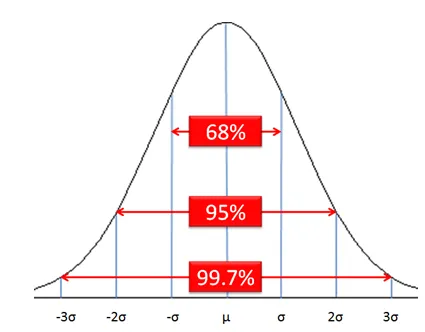

In [146]:
int_cols = ['nrPreco',
            'nrCondominio',
            'nrIptu',
            'nrArea(m2)',
            'nrQuartos',
            'nrBanheiros',
            'nrVagas',
            'nrAndar',
            'nrSuites']
            
for col in int_cols:
    limite_inferior, limite_superior = norm.interval(confidence=0.99, loc=df[col].mean(), scale=df[col].std())
    df = df[(df[col] <= limite_superior) & (df[col] >= limite_inferior)]

df[int_cols].describe()

,nrPreco,nrCondominio,nrIptu,nrArea(m2),nrQuartos,nrBanheiros,nrVagas,nrAndar,nrSuites
count,5198.0000,5198.0000,5198.0000,5198.0000,5198.0000,5198.0000,5198.0000,5198.0000,5198.0000
mean,927146.2128,1011.0160,391.4915,104.3769,2.2857,2.3803,1.2376,5.1772,0.8813
std,608548.2348,572.1051,606.1344,46.5944,0.7182,1.0952,0.6350,5.5359,0.8722
min,115000.0000,0.0000,0.0000,11.0000,1.0000,1.0000,0.0000,0.0000,0.0000
25%,520000.0000,620.0000,160.0000,70.0000,2.0000,2.0000,1.0000,1.0000,0.0000
50%,750000.0000,900.0000,260.0000,93.0000,2.0000,2.0000,1.0000,3.0000,1.0000
75%,1120000.0000,1300.0000,400.0000,130.0000,3.0000,3.0000,2.0000,8.0000,1.0000
max,5800000.0000,4956.0000,6502.0000,282.0000,4.0000,5.0000,3.0000,26.0000,3.0000


### Codificação de variáveis categóricas

Utilizamos o método `get_dummies()` para transformar variáveis categóricas em variáveis dummy. Essa transformação é necessária para que essas variáveis possam ser utilizadas em análises estatísticas e modelos de machine learning.

In [147]:
df.drop('dtCriacao', axis=1, inplace=True)

In [148]:
amenities_cat = df.iloc[:, 15:].columns

dummies_amenities =pd.get_dummies(df[amenities_cat], prefix='', prefix_sep='', drop_first=True, dtype=int)

df = pd.concat([df.iloc[:, :15], dummies_amenities], axis=1)

### Feature Engineering

Criamos novas variáveis para enriquecer a análise:

- **`valor_por_m2`**: Representa o valor por metro quadrado, permitindo comparar imóveis de diferentes tamanhos.

- **`nrQtdComodidades`**: Representa o número total de comodidades disponíveis em cada imóvel.

In [149]:
df['valor_por_m2'] = df['nrPreco']/df['nrArea(m2)']

df['nrQtdComodidades'] = df.iloc[:, 15:-1].sum(axis=1)

A partir do campo `endereco`, extraímos os bairros dos imóveis. Essa informação é crucial para análises geográficas e para entender como os preços variam entre diferentes regiões.

In [150]:
def extract_bairro(endereco):
    """
    Extrai o bairro do endereço.
    """
    match = re.search(r" -\s*([^,]+),", endereco)
    if match:
        return match.group(1).strip()
    else:
        match = re.search(r"^([^,]+),", endereco)
        if match:
            return match.group(1).strip()
        else:
            return None

df['bairro'] = df['endereco'].apply(extract_bairro)

# Ajuste fino nos nomes de alguns bairros
df['bairro'] = df['bairro'].replace('ap 21 - Gonzaga', 'Gonzaga')

df['bairro'].value_counts()

bairro
Gonzaga              914
Boqueirão            796
Ponta da Praia       591
Embaré               571
José Menino          445
Aparecida            436
Marapé               335
Campo Grande         320
Pompeia              273
Macuco               135
Vila Matias          132
Encruzilhada          86
Vila Belmiro          73
Estuario              69
Castelo                5
Morro Nova Cintra      4
Saboó                  4
Areia Branca           4
Jabaquara              2
Centro                 1
Bom Retiro             1
Santa Maria            1
Name: count, dtype: int64

### Conversão de datas

As colunas de datas foram convertidas para o formato `datetime`.

In [151]:
df['data_coleta'] = pd.to_datetime(df['data_coleta'], dayfirst=True, errors='coerce')
df['data_criacao'] = pd.to_datetime(df['data_criacao'], dayfirst=True, errors='coerce')

## Analise Exploratória de Dados

##### Configurações do Seaborn

In [152]:
color = '#0077b6'

sns.set_style("darkgrid")

plt.rcParams.update({
    "axes.titlesize" : 16,
    "axes.titlelocation": "left",
    "axes.titley": 1.025,
    "axes.labelsize" : 12,
    "lines.linewidth" : 1.5,
    "lines.markersize" : 10,
    "xtick.labelsize" : 10,
    "ytick.labelsize" : 10
})

#### Bairros com mais imóveis

Identificamos os bairros com maior número de imóveis disponíveis. Essa análise ajuda a entender a distribuição dos dados e a representatividade de cada bairro no dataset.

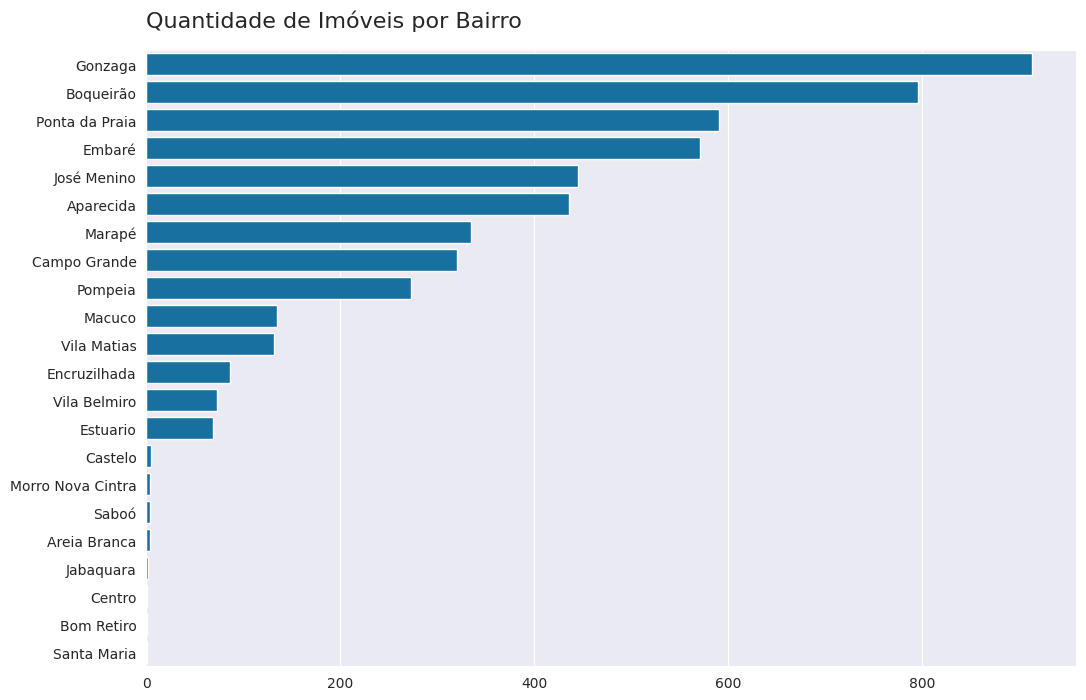

In [153]:
order = df['bairro'].value_counts().index

plt.figure(figsize=(12, 8))
ax = sns.countplot(df, y='bairro', 
                       order=order, 
                       color=color)

ax.set_title('Quantidade de Imóveis por Bairro');
ax.set_xlabel('')
ax.set_ylabel('');

Como podemos ver, os bairros "Morro Nova Cintra", "Castelo", "Saboó", "Areia Branca" e "Centro" possuem poucas amostras disponiveis, e não podem ser considerados representativos pois podem dificultar uma comparação justa com os bairros mais bem representados. Logo irei destacar esses bairros nos próximos gráficos para representar que suas amostras são limitadas.

In [154]:
color_bairros = {
    bairro: '#669bbc' if count < 30 else '#0077b6' for bairro, count in df['bairro'].value_counts().items()
}

#### Valor médio dos imóveis por bairro

Analisamos o valor médio dos imóveis em cada bairro. Essa análise destaca quais bairros possuem os imóveis mais caros e mais acessíveis, fornecendo insights sobre o mercado imobiliário local.

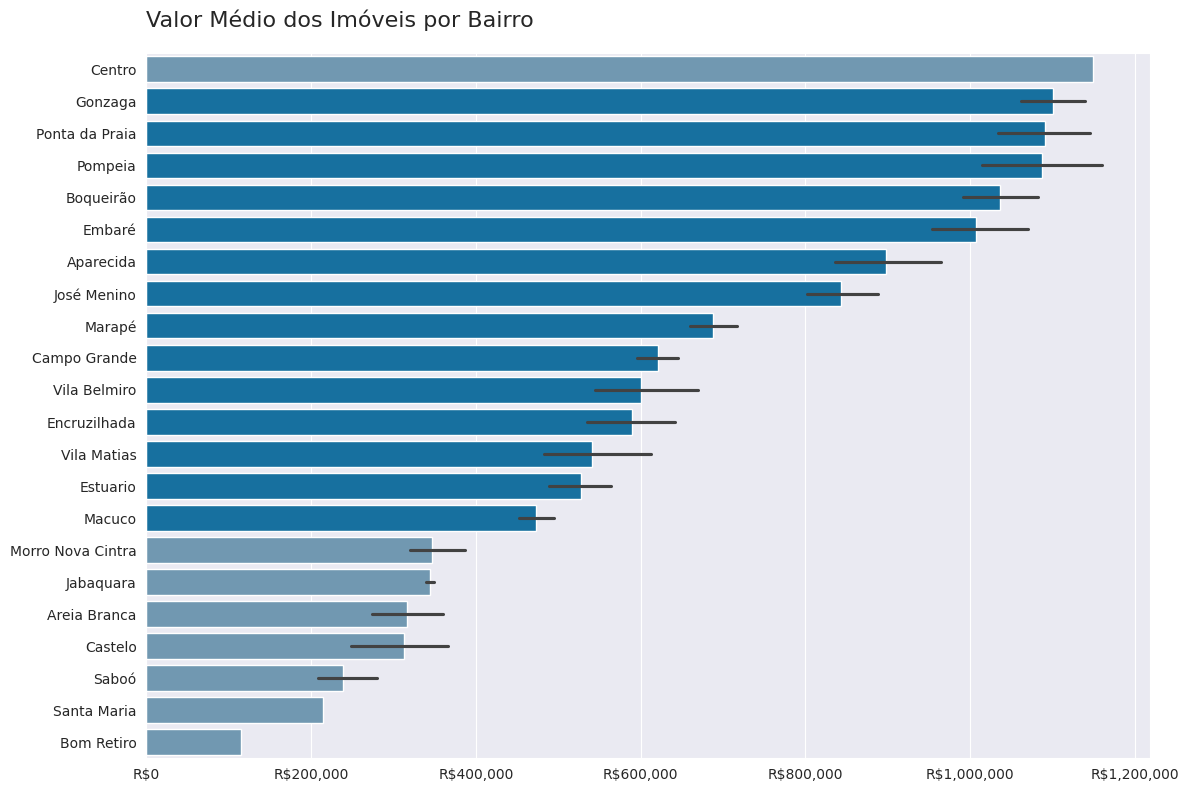

In [155]:
order = df.groupby('bairro')['nrPreco'].mean().sort_values(ascending=False).index

plt.figure(figsize=(12, 8))
ax = sns.barplot(df, x='nrPreco', y='bairro', hue='bairro', estimator=np.mean, order=order, palette=color_bairros, legend=False)

ax.set_title('Valor Médio dos Imóveis por Bairro');
ax.xaxis.set_major_formatter('R${x:,.0f}')
ax.set_xlabel('')
ax.set_ylabel('')

plt.tight_layout()
plt.show();

#### Preço por metro quadrado por bairro

Calculamos o preço médio por metro quadrado em cada bairro. Essa métrica é útil para comparar o custo-benefício de imóveis em diferentes regiões.

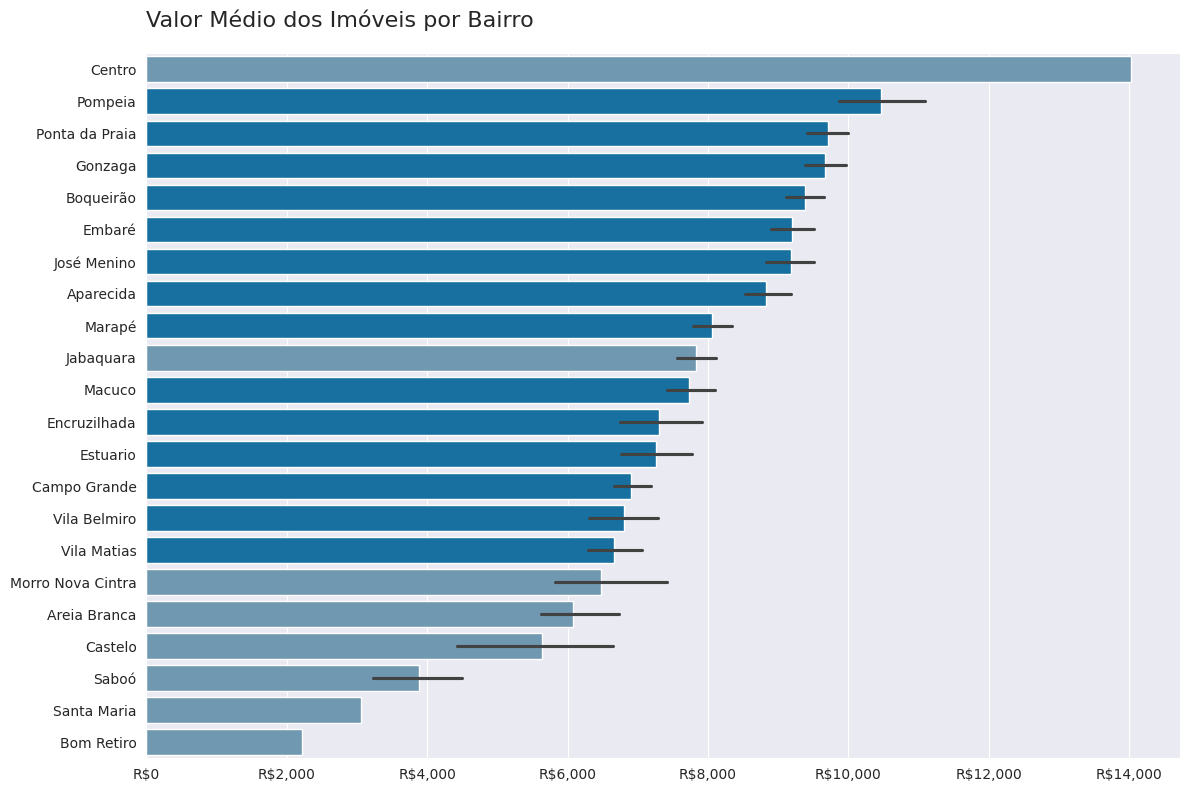

In [156]:
order = df.groupby('bairro')['valor_por_m2'].mean().sort_values(ascending=False).index

plt.figure(figsize=(12, 8))
ax =sns.barplot(df, x=df['nrPreco']/df['nrArea(m2)'], y='bairro', hue='bairro', estimator=np.mean, order=order, palette=color_bairros, legend=False)   

ax.xaxis.set_major_formatter('R${x:,.0f}')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Valor Médio dos Imóveis por Bairro')
plt.tight_layout()
plt.show();

### Distribuição de preços

Visualizamos a distribuição dos preços dos imóveis. Essa análise ajuda a identificar a faixa de preços mais comum e a presença de valores extremos.

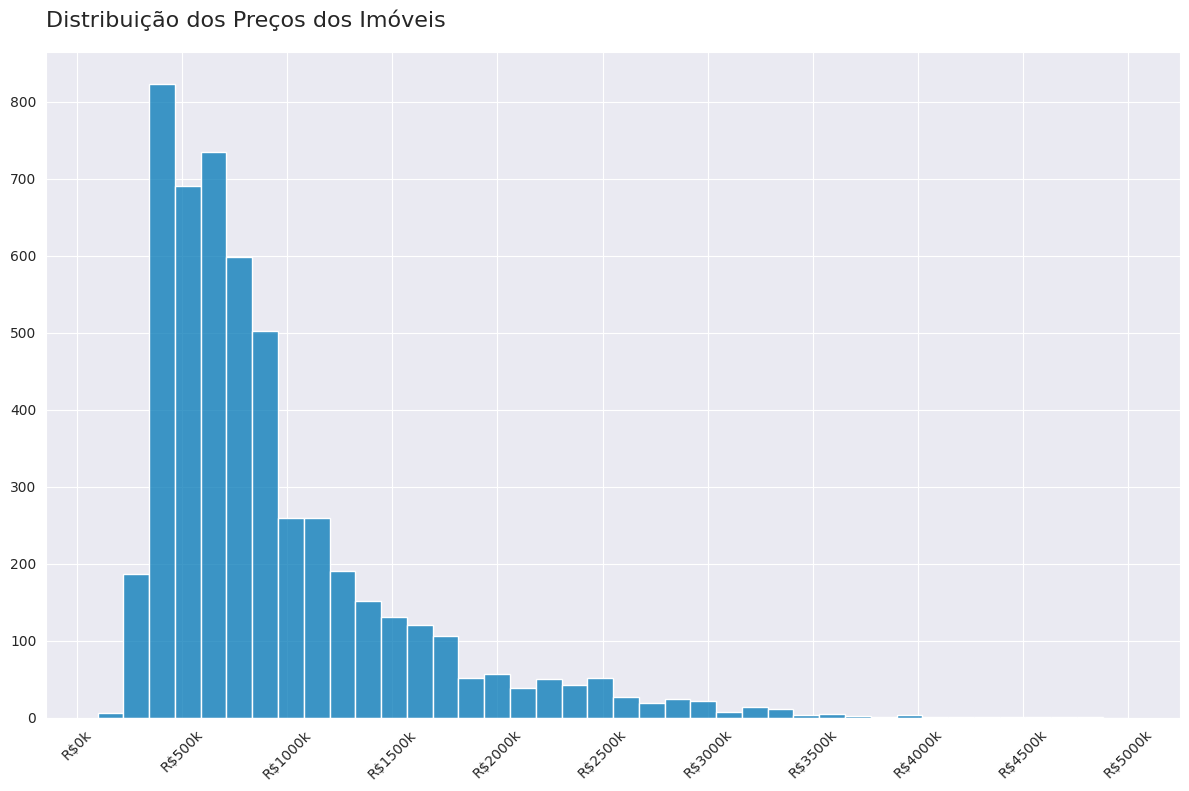

In [157]:
plt.figure(figsize=(12, 8))
sns.histplot(df, x='nrPreco', bins=40, binrange=(100000, 5000000), color=color)

xticks = np.arange(0, 5000001, 500000)
plt.xticks(xticks, [f'R${x//1000}k' for x in xticks], rotation=45)
plt.xlabel('')
plt.ylabel('')
plt.title('Distribuição dos Preços dos Imóveis')
plt.tight_layout()
plt.show();

In [158]:
df['nrPreco'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
nrPreco,5198.0000,927146.2128,608548.2348,115000.0000,520000.0000,750000.0000,1120000.0000,5800000.0000


### Distribuição de preços por metro quadrado

Analisamos a distribuição dos preços por metro quadrado. Essa métrica é importante para entender como o custo do espaço varia entre os imóveis.

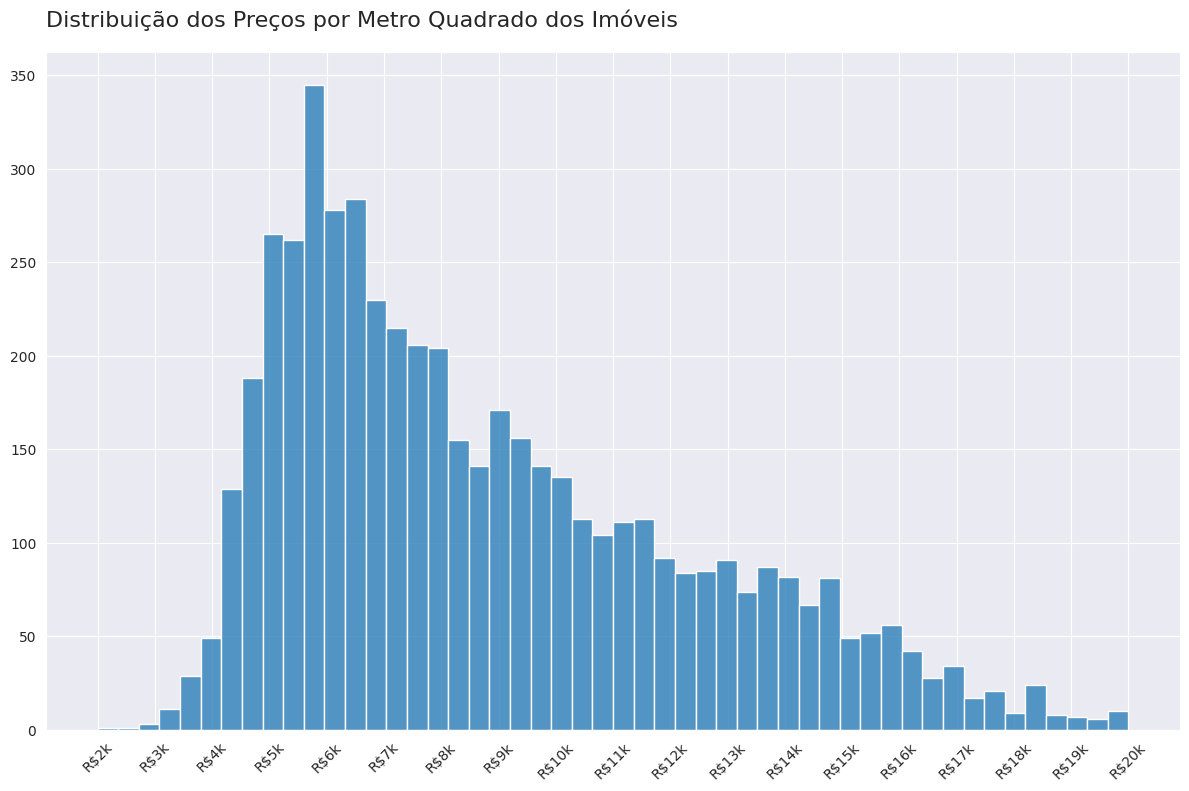

In [159]:
plt.figure(figsize=(12, 8))
sns.histplot(df, x='valor_por_m2', bins=50, binrange=(2000, 20000))

xticks = np.arange(2000, 20001, 1000)
plt.xticks(xticks, [f'R${x//1000}k' for x in xticks], rotation=45)
plt.xlabel('')
plt.ylabel('')
plt.title('Distribuição dos Preços por Metro Quadrado dos Imóveis')
plt.tight_layout()
plt.show()

In [160]:
df['valor_por_m2'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
valor_por_m2,5198.0000,8978.8926,3897.9670,2211.5385,5978.6957,7938.8422,11280.6874,63636.3636


### Preço por suítes

Exploramos como o número de suítes impacta o preço dos imóveis. Essa análise ajuda a identificar se imóveis com mais suítes possuem preços significativamente mais altos.

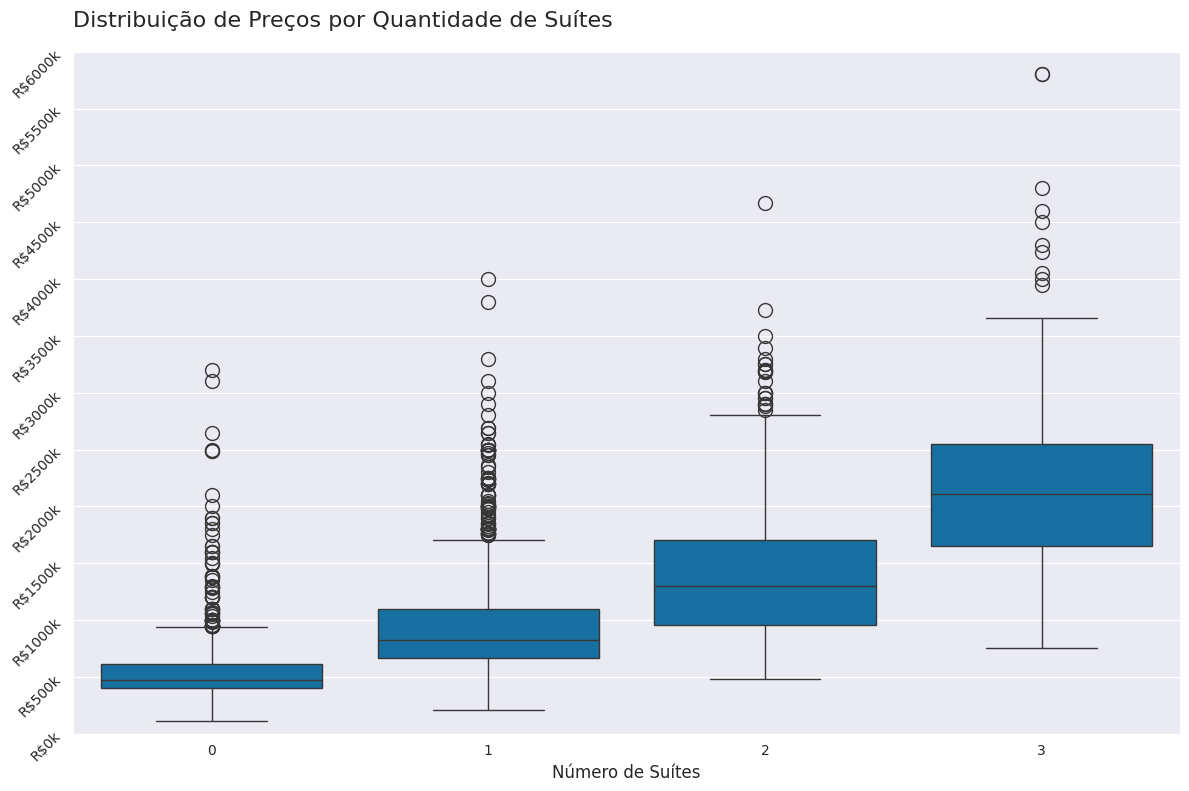

In [161]:
plt.figure(figsize=(12, 8))
sns.boxplot(df, y='nrPreco', x='nrSuites', color=color)


plt.ylim(0, 6000000)  # Limita o eixo Y entre 0 e 2 milhões
yticks = np.arange(0, 6000001, 500000)
plt.yticks(yticks, [f'R${x//1000}k' for x in yticks], rotation=45)
plt.xlabel('Número de Suítes')
plt.ylabel('')
plt.title('Distribuição de Preços por Quantidade de Suítes')
plt.tight_layout()
plt.show()

In [162]:
df.groupby('nrSuites')['nrPreco'].describe().T

nrSuites,0,1,2,3
count,1940.0000,2317.0000,559.0000,382.0000
mean,535286.5165,931378.7078,1425412.3596,2162408.8927
std,243309.1717,393487.1093,622124.1578,752356.2492
min,115000.0000,210000.0000,480000.0000,750000.0000
25%,399000.0000,670000.0000,952500.0000,1650000.0000
50%,470750.0000,827000.0000,1299190.0000,2110000.0000
75%,615500.0000,1100000.0000,1700000.0000,2549835.0000
max,3200000.0000,3999000.0000,4665000.0000,5800000.0000


### Preço por andar

Analisamos a relação entre o número do andar e o preço dos imóveis. Essa análise é relevante para entender se imóveis em andares mais altos possuem maior valor agregado.

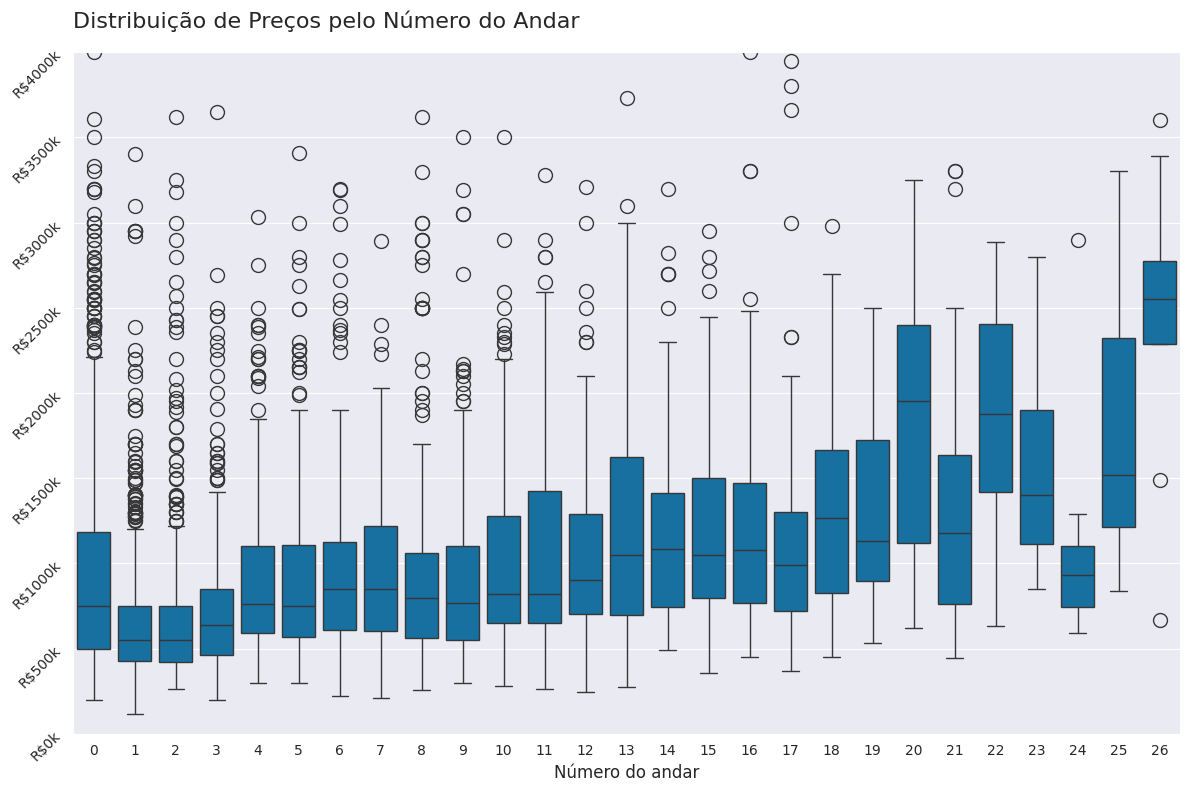

In [163]:
plt.figure(figsize=(12, 8))
sns.boxplot(df, y='nrPreco', x='nrAndar', color=color)


plt.ylim(0, 4000000)  # Limita o eixo Y entre 0 e 2 milhões
yticks = np.arange(0, 4000001, 500000)
plt.yticks(yticks, [f'R${x//1000}k' for x in yticks], rotation=45)
plt.xlabel('Número do andar')
plt.ylabel('')
plt.title('Distribuição de Preços pelo Número do Andar')
plt.tight_layout()
plt.show()

In [164]:
df.groupby('nrAndar')['nrPreco'].describe().T

nrAndar,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
count,1168.0000,521.0000,558.0000,469.0000,293.0000,267.0000,252.0000,211.0000,261.0000,219.0000,169.0000,116.0000,113.0000,103.0000,70.0000,61.0000,55.0000,61.0000,42.0000,35.0000,29.0000,46.0000,22.0000,14.0000,17.0000,18.0000,8.0000
mean,934530.4615,701630.6334,688873.1989,735077.5906,910072.6416,940782.6517,952688.6151,957966.3981,964872.7586,934704.6575,1027574.0769,1107465.5259,1094496.2478,1242243.8835,1218208.5714,1236163.9344,1340403.9636,1215260.6557,1325705.2143,1343857.1429,1998625.3103,1336374.5652,1784545.4545,1526607.1429,1205736.4706,1753361.1111,2421750.0000
std,609898.3036,467904.0347,455158.7560,414223.4044,484546.4312,581436.6515,535367.3249,499501.7956,617660.4883,567335.0292,584611.7087,694063.7141,577302.9477,786842.8752,624878.8735,737304.4188,888632.0048,784031.7277,617158.6895,637336.1447,1302248.4231,757630.6003,673169.3148,591232.4838,1001454.4025,739731.8633,951309.7363
min,199520.0000,115000.0000,260000.0000,195000.0000,295000.0000,299000.0000,219000.0000,210000.0000,255000.0000,300000.0000,280000.0000,265000.0000,245000.0000,275000.0000,490000.0000,355000.0000,450000.0000,370000.0000,450000.0000,530000.0000,620000.0000,442560.0000,630000.0000,850000.0000,590000.0000,840000.0000,670000.0000
25%,497250.0000,425000.0000,418500.0000,460000.0000,590000.0000,565000.0000,610000.0000,600000.0000,560000.0000,550000.0000,649000.0000,647500.0000,700000.0000,696000.0000,746250.0000,798000.0000,770000.0000,720000.0000,826750.0000,895000.0000,1120000.0000,761750.0000,1418750.0000,1114075.0000,746000.0000,1214375.0000,2285000.0000
50%,750000.0000,548000.0000,552000.0000,636000.0000,761000.0000,750000.0000,850000.0000,850000.0000,799000.0000,770000.0000,820000.0000,820000.0000,900000.0000,1050000.0000,1085000.0000,1050000.0000,1080000.0000,990000.0000,1265000.0000,1129000.0000,1950000.0000,1180000.0000,1875000.0000,1400000.0000,930000.0000,1519500.0000,2552000.0000
75%,1185250.0000,750000.0000,750000.0000,850000.0000,1100000.0000,1110000.0000,1127250.0000,1219500.0000,1062000.0000,1103300.0000,1277000.0000,1425000.0000,1290000.0000,1625000.0000,1412500.0000,1500000.0000,1470000.0000,1300000.0000,1667500.0000,1724500.0000,2400000.0000,1637250.0000,2402500.0000,1900000.0000,1100000.0000,2325000.0000,2775000.0000
max,4300000.0000,3400000.0000,3620000.0000,3650000.0000,3030000.0000,4240600.0000,3200000.0000,4050000.0000,3620000.0000,3500000.0000,3500000.0000,3280000.0000,3210000.0000,4800000.0000,3200000.0000,4665000.0000,4600000.0000,3950000.0000,2980000.0000,2500000.0000,5800000.0000,3300000.0000,2885000.0000,2800000.0000,4500000.0000,3300000.0000,3600000.0000


### Preço por quarto

Investigamos como o número de quartos influencia o preço dos imóveis. Essa análise é útil para identificar a valorização de imóveis com mais quartos.

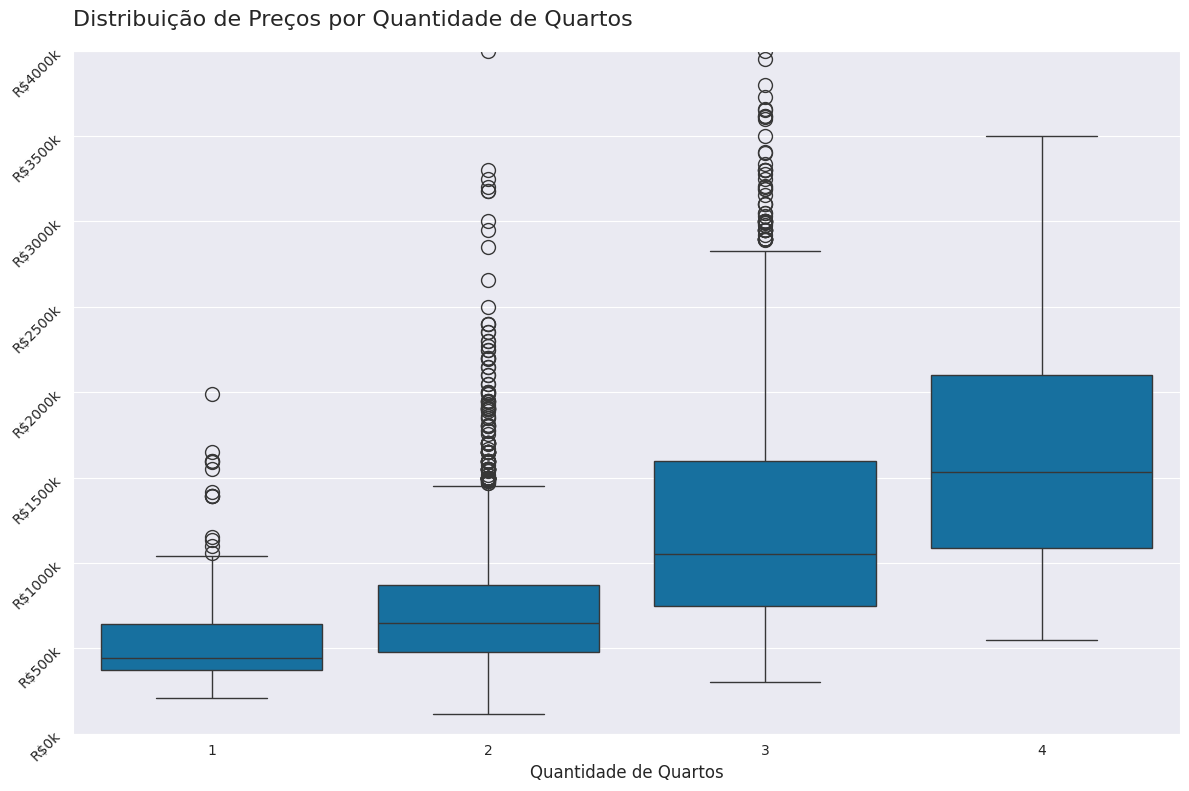

In [165]:
plt.figure(figsize=(12, 8))
sns.boxplot(df, y='nrPreco', x='nrQuartos', color=color)


plt.ylim(0, 4000000)  # Limita o eixo Y entre 0 e 2 milhões
yticks = np.arange(0, 4000001, 500000)
plt.yticks(yticks, [f'R${x//1000}k' for x in yticks], rotation=45)
plt.xlabel('Quantidade de Quartos')
plt.ylabel('')
plt.title('Distribuição de Preços por Quantidade de Quartos')
plt.tight_layout()
plt.show()

In [166]:
df.groupby('nrQuartos')['nrPreco'].describe().T

nrQuartos,1,2,3,4
count,647.0000,2582.0000,1806.0000,163.0000
mean,521792.8454,742130.1456,1268209.0293,1687978.5276
std,226223.7619,383250.4471,709258.7120,806297.1833
min,210000.0000,115000.0000,300000.0000,550000.0000
25%,372000.0000,480000.0000,750000.0000,1089500.0000
50%,443700.0000,650000.0000,1050000.0000,1530000.0000
75%,640000.0000,870000.0000,1600000.0000,2099500.0000
max,1990000.0000,3999000.0000,5800000.0000,4800000.0000


### Preço por Banheiros

Exploramos a relação entre o número de banheiros e o preço dos imóveis. Essa análise ajuda a entender se imóveis com mais banheiros possuem maior valor de mercado.

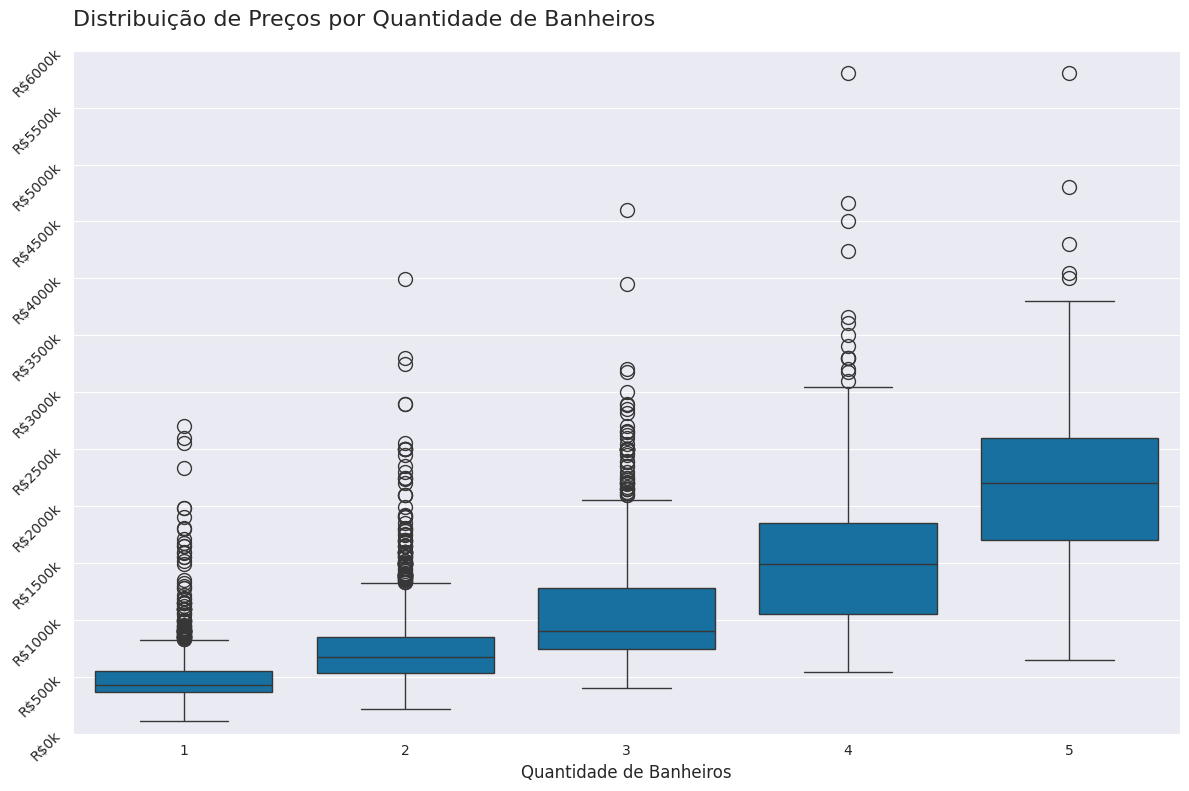

In [167]:
plt.figure(figsize=(12, 8))
sns.boxplot(df, y='nrPreco', x='nrBanheiros', color=color)


plt.ylim(0, 6000000)  # Limita o eixo Y entre 0 e 2 milhões
yticks = np.arange(0, 6000001, 500000)
plt.yticks(yticks, [f'R${x//1000}k' for x in yticks], rotation=45)
plt.xlabel('Quantidade de Banheiros')
plt.ylabel('')
plt.title('Distribuição de Preços por Quantidade de Banheiros')
plt.tight_layout()
plt.show()

### Preço por Comodidades

Analisamos como o número de comodidades impacta o preço dos imóveis. Essa análise é útil para identificar se a quantidade de características agregam mais valor aos imóveis.

In [168]:
df['nrQtdComodidades'].value_counts()

nrQtdComodidades
5     413
7     407
6     384
8     383
9     360
4     335
3     294
10    284
11    259
2     238
12    221
1     207
0     192
13    169
14    143
15    120
16    118
17    106
19     96
18     82
20     70
21     58
22     45
25     39
23     38
24     37
26     33
27     13
29     12
30     10
28      7
33      5
31      3
38      2
45      2
41      2
53      2
56      2
39      1
44      1
57      1
47      1
50      1
46      1
43      1
Name: count, dtype: int64

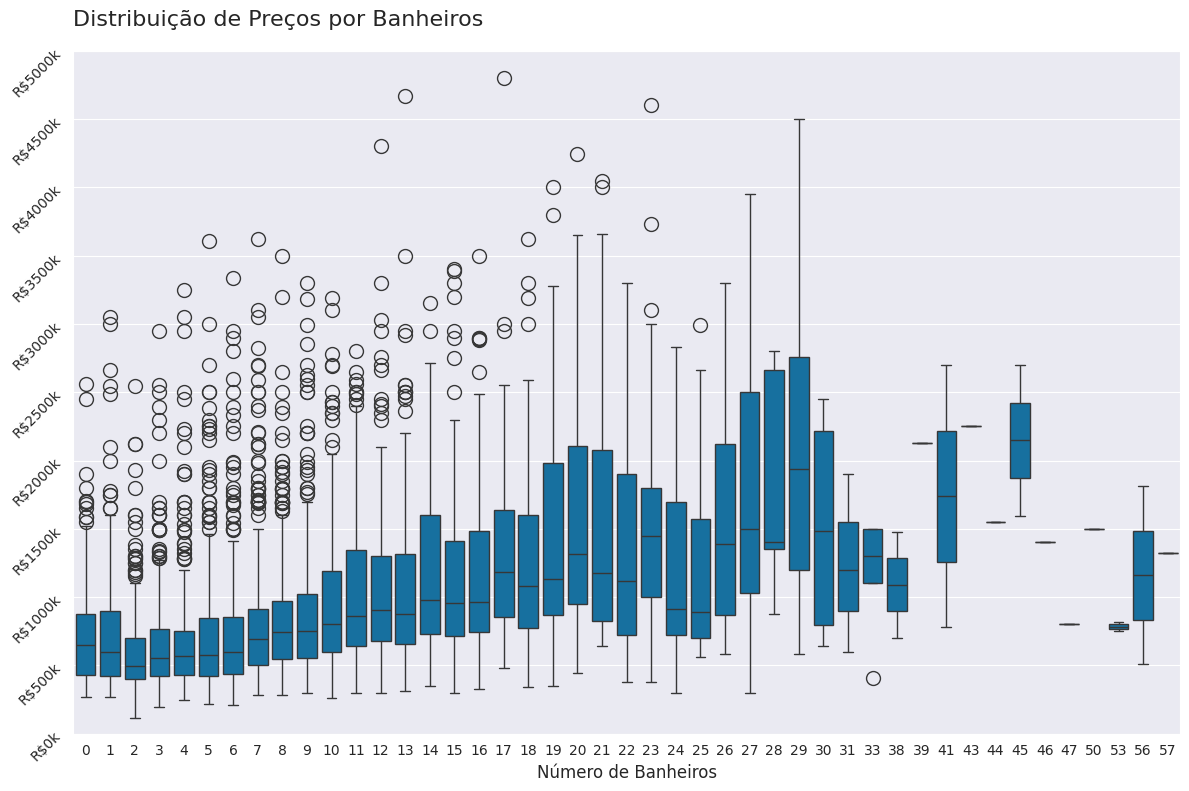

In [169]:
plt.figure(figsize=(12, 8))
sns.boxplot(df, y='nrPreco', x='nrQtdComodidades', color=color)


plt.ylim(0, 5000000)
yticks = np.arange(0, 5000001, 500000)
plt.yticks(yticks, [f'R${x//1000}k' for x in yticks], rotation=45)
plt.xlabel('Número de Banheiros')
plt.ylabel('')
plt.title('Distribuição de Preços por Banheiros')
plt.tight_layout()
plt.show()

### Frequência de comodidades

Identificamos as comodidades mais comuns nos imóveis. Essa análise ajuda a entender o que é mais valorizado pelos compradores e quais características são mais frequentes no mercado.

<Figure size 1200x800 with 0 Axes>

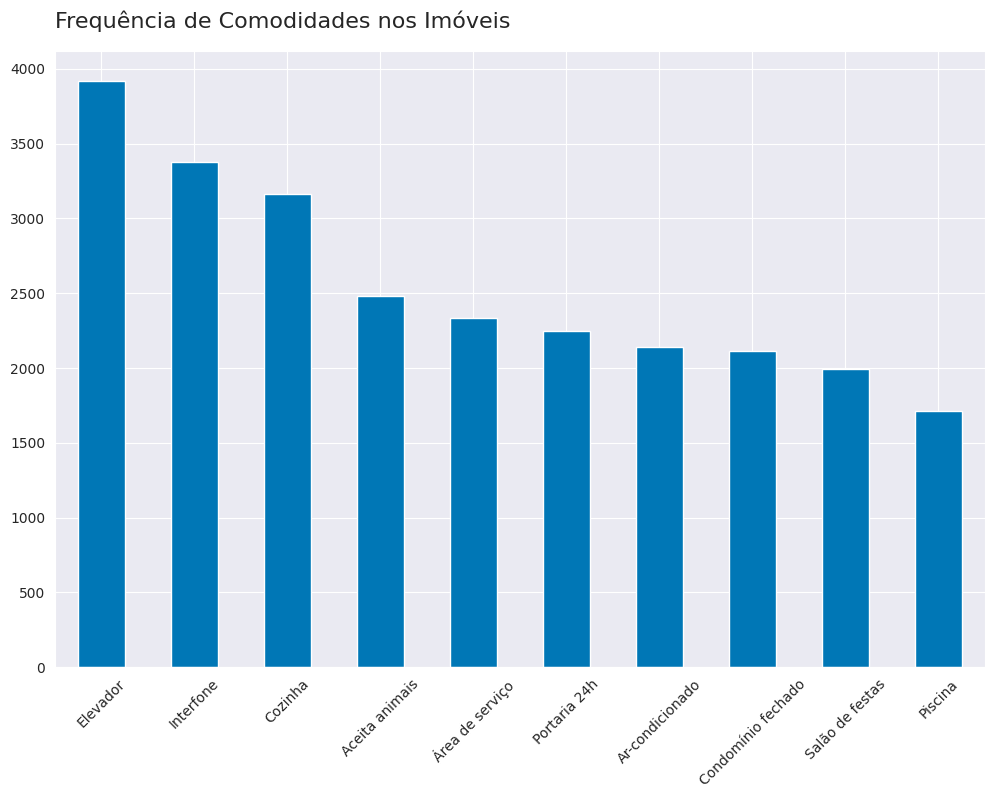

In [170]:
plt.figure(figsize=(12, 8))
comodidades = df.iloc[:, 15:-4].sum().sort_values(ascending=False).head(10).to_frame()
comodidades.plot(kind='bar', figsize=(12, 8), color='#0077b6', legend=False)
plt.title('Frequência de Comodidades nos Imóveis')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)
plt.show();

## Matriz de Correlação

A matriz de correlação nos ajuda a identificar a relação entre as variáveis numéricas do dataset. Valores próximos de 1 indicam uma forte correlação positiva, enquanto valores próximos de -1 indicam uma forte correlação negativa.

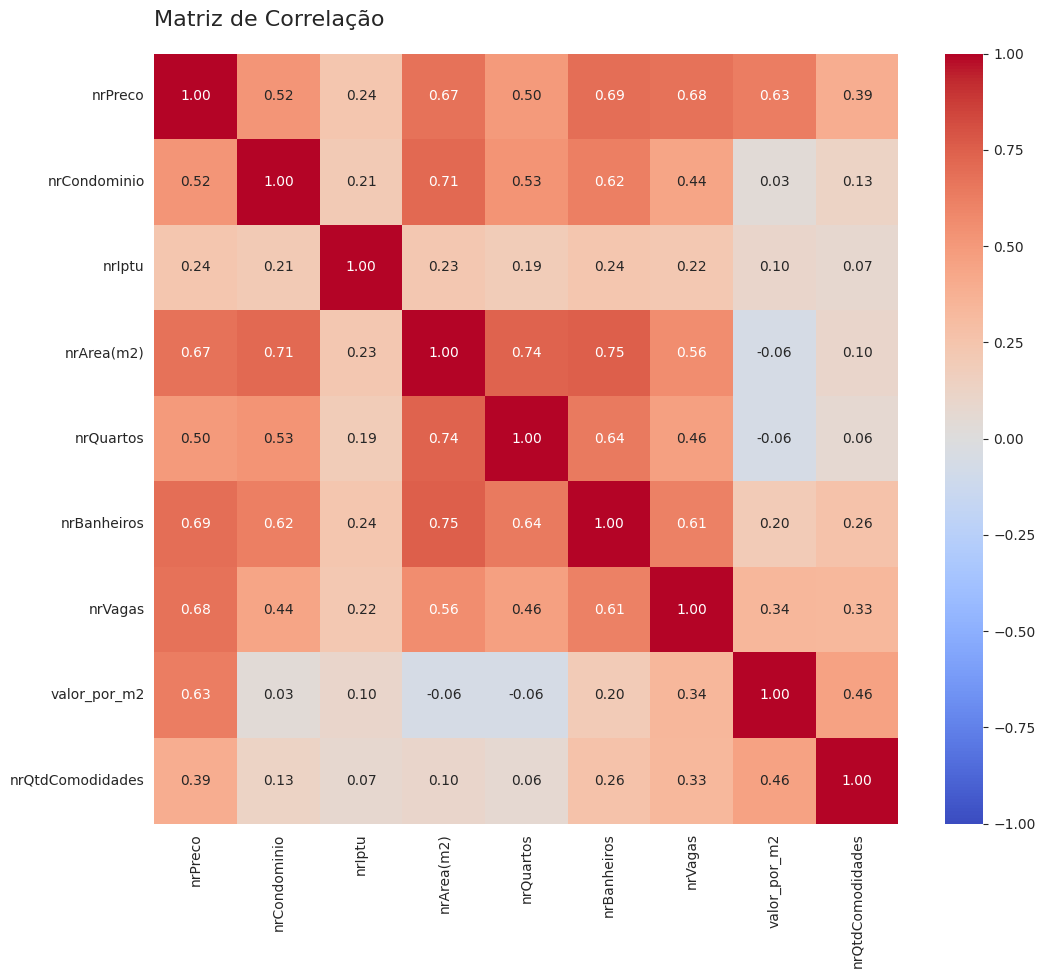

In [171]:
plt.figure(figsize=(12, 10))

correlation_matrix = df[['nrPreco', 'nrCondominio', 'nrIptu', 'nrArea(m2)', 'nrQuartos', 'nrBanheiros', 'nrVagas', 'valor_por_m2', 'nrQtdComodidades']].corr()
sns.heatmap(correlation_matrix, annot=True, vmax=1, vmin=-1, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

Essa análise nos mostra que temos valores que impactam positivamente a variável target `valor`, como a quantidade de banheiros do imóvel (`nrBanheiros`),o tamanho do imóvel (`nrTamanho(m2)`) e a quantidade de vagas (`nrVagas`). Porém, é necessario ter atenção a variáveis que possuem multicolinearidade como `condominio` x `nrTamanho(m2)`, `nrTamanho(m2)` x `nrQuartos` e `nrTamanho(m2)` x `nrBanheiros`.

## Teste F ANOVA

Uma maneira mais eficaz de avaliar a associação entre as variáveis e uma resposta categórica é por meio do teste F ANOVA. Esse teste estatístico mede a variabilidade entre os grupos em relação à variabilidade dentro dos próprios grupos, permitindo identificar quais características possuem maior impacto na variável alvo. Dessa forma, conseguimos selecionar as features mais relevantes para a modelagem, melhorando a performance do modelo e reduzindo a dimensionalidade dos dados.

In [172]:
categorical_features = df.iloc[:, 15:-3].columns
target = 'nrPreco'

X = df[categorical_features]
y = df[target]

[f_stat, f_p_value] = f_regression(X,y)

f_test_df = pd.DataFrame({'Feature':X.columns,
                          'F statistic':f_stat,
                          'p value':f_p_value})

f_test_df.sort_values('p value').head(30)

,Feature,F statistic,p value
20,Churrasqueira,742.0274,0.0000
13,Varanda gourmet,740.5782,0.0000
8,Piscina,738.3923,0.0000
10,Academia,649.9356,0.0000
15,Sauna,613.8739,0.0000
14,Salão de festas,536.9960,0.0000
21,Playground,533.1026,0.0000
11,Espaço gourmet,467.7156,0.0000
5,Vista para o mar,464.5760,0.0000
22,Quadra poliesportiva,375.7310,0.0000


In [176]:
import os
path = os.path.join('../data/processed', 'zapimoveis-santos.csv')

In [177]:
os.makedirs(name=os.path.dirname(p=path), exist_ok=True)

In [178]:
df.to_csv('../data/processed/zapimoveis_santos.csv', index=False)